In [16]:
import pandas as pd
from pandas.tseries.holiday import AbstractHolidayCalendar,Holiday,nearest_workday
from pandas.tseries.offsets import CustomBusinessDay

In [17]:
pd.date_range(start="2024-08-01",end="2024-08-31",freq="B") # B,D,W,h

DatetimeIndex(['2024-08-01', '2024-08-02', '2024-08-05', '2024-08-06',
               '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-12',
               '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16',
               '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22',
               '2024-08-23', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30'],
              dtype='datetime64[ns]', freq='B')

In [18]:
class MyCalendar(AbstractHolidayCalendar):
     rules = [Holiday("Independance Day",month=8,day=15,observance=nearest_workday),
              Holiday("My Birth Day",month=8,day=14,observance=nearest_workday),
              Holiday("Random Day",month=8,day=17,observance=nearest_workday),
              ]

In [19]:
my_custom_calender = MyCalendar()

In [20]:
custom_business_days = CustomBusinessDay(calendar=my_custom_calender)

In [21]:
pd.date_range(start="2024-08-01",end="2024-08-31",freq=custom_business_days)

DatetimeIndex(['2024-08-01', '2024-08-02', '2024-08-05', '2024-08-06',
               '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-12',
               '2024-08-13', '2024-08-19', '2024-08-20', '2024-08-21',
               '2024-08-22', '2024-08-23', '2024-08-26', '2024-08-27',
               '2024-08-28', '2024-08-29', '2024-08-30'],
              dtype='datetime64[ns]', freq='C')

In [13]:
custom_business_days_for_dubai = CustomBusinessDay(weekmask="Sun Mon Tue Wed Thu")

In [14]:
pd.date_range(start="2024-08-01",end="2024-08-31",freq=custom_business_days_for_dubai)

DatetimeIndex(['2024-08-01', '2024-08-04', '2024-08-05', '2024-08-06',
               '2024-08-07', '2024-08-08', '2024-08-11', '2024-08-12',
               '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-18',
               '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22',
               '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29'],
              dtype='datetime64[ns]', freq='C')

In [22]:
# Rolling

In [23]:
df = pd.DataFrame({"Days": ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                   "sales": [300,500,200,100,600,650,700]})

In [24]:
df

,Days,sales
0,Mon,300
1,Tue,500
2,Wed,200
3,Thu,100
4,Fri,600
5,Sat,650
6,Sun,700


In [25]:
df['sales'].rolling(window=3).mean()

,sales
0,NaN
1,NaN
2,333.333333
3,266.666667
4,300.000000
5,450.000000
6,650.000000


In [31]:
data = pd.read_csv("./RELIANCE-EQ.csv",parse_dates=["Date "],index_col="Date ")

In [35]:
data['close ']

,close
Date,
2024-08-27,"3,000.90"
2024-08-26,"3,025.20"
2024-08-23,"2,999.95"
2024-08-22,"2,996.25"
2024-08-21,"2,997.35"
...,...
2023-09-01,"2,412.65"
2023-08-31,"2,407.00"
2023-08-30,"2,418.05"


In [44]:
def format_price(price):
  price = price.split(",")
  return float("".join(price))

data['close '] = data['close '].apply(format_price)

In [38]:
list(map(str,[12,56,78,90]))

['12', '56', '78', '90']

<Axes: xlabel='Date '>

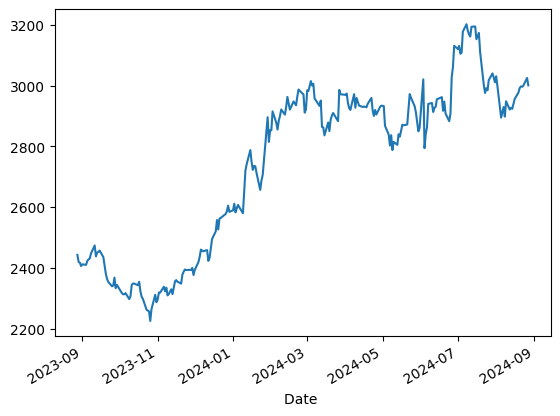

In [46]:
data['close '].plot()

In [52]:
data['close '].resample('S').mean()

,close
Date,
2023-08-28 00:00:00,2443.75
2023-08-28 00:00:01,NaN
2023-08-28 00:00:02,NaN
2023-08-28 00:00:03,NaN
2023-08-28 00:00:04,NaN
...,...
2024-08-26 23:59:56,NaN
2024-08-26 23:59:57,NaN
2024-08-26 23:59:58,NaN
